In [1]:
import os
import re
import csv
import pandas as pd
# 设置你的文件夹路径
folder_path = './markdown'

字体安装，请参考： https://www.jianshu.com/p/2331fd79e19f


In [2]:

# 读取文件夹中的所有文件
files = [f for f in os.listdir(folder_path) if f.endswith('.md')]

# 创建一个空的DataFrame
df = pd.DataFrame(columns=['filename', 'data', 'main_title'])


In [13]:
# 遍历文件列表，提取日期和标题
for file in files:
    # 去掉文件扩展名
    base_name = os.path.splitext(file)[0]
    # 文件名格式为：YYYYMMDD可能的数字开头的主标题.md
    data = base_name[:8]  # 提取日期部分
    main_title = base_name[8:]  # 提取主标题部分
    
    # 将文件信息添加到DataFrame中
    df = df.append({
        'filename': file,
        'data': data,
        'main_title': main_title
    }, ignore_index=True)

# 显示DataFrame
print(df.head(5))

# 如果需要，将DataFrame保存到CSV文件
csv_file_path = 'output.csv'
df.to_csv(csv_file_path, index=False, encoding='utf-8')

print(f"DataFrame has been written to {csv_file_path}")

                                              filename      data  \
0    20210312ComputersEnvironmentandUrbanSystems审稿意...  20210312   
1                  20210317一种从文本语义信息中抽取地理属性的社会感知新方法.md  20210317   
2            20210415基于多源传感器的城市人居环境与居民健康感知中国武汉的案例研究.md  20210415   
3            20210416BuildingandEnvironment论文下载链接更新.md  20210416   
4                 20210523星湖咖啡屋第28期张岩功不唐捐一个中等生的科研体验.md  20210523   
..                                                 ...       ...   
101              20240602绘制订阅者的全家福留言送5件GISChat定制文化衫.md  20240602   
102                     20240604中国地图故事第六辑高考关注度的地区差异.md  20240604   
103                         20240607茶话会第8期分享本周末2000.md  20240607   
104  20240701GISChat第9期学术生涯规划与科研经验分享明天7月2日晚2000准时开讲.md  20240701   
105                                20240704第9期茶话会回顾.md  20240704   

                                     main_title  
0    ComputersEnvironmentandUrbanSystems审稿意见与回复  
1                      一种从文本语义信息中抽取地理属性的社会感知新方法  
2                基于多源传感器的城市人居环境与居

读取已经构建好的版本

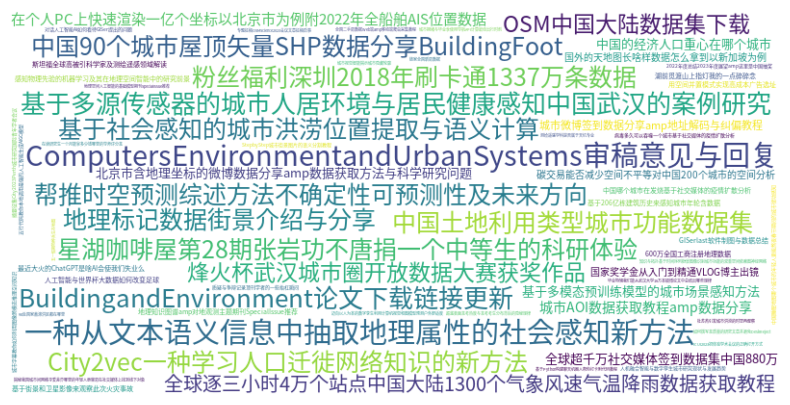

In [3]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df = pd.read_csv('output.csv')
# 合并所有主标题文本
all_titles = ' '.join(df['main_title'])

font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"  # 适用于Linux系统

# 创建词云对象，设置字体路径
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path)
# 生成词云
wordcloud.generate(all_titles)
# 使用matplotlib显示词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不显示坐标轴
plt.show()

数据清洗

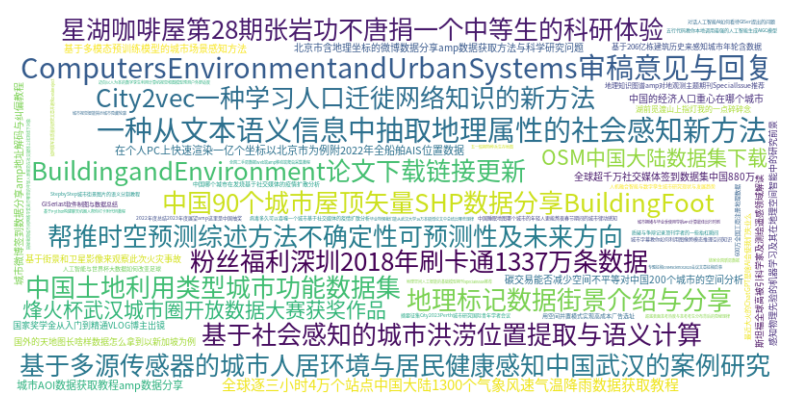

In [4]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 定义停用词列表
stopwords = set(['的', '和', '是', '在', '一个', '或者', '或者', '一些', '这个', '那个'])

# 清洗文本并合并所有主标题文本
all_titles_cleaned = []

for title in df['main_title']:
    # 我们使用简单的空格分词，实际应用中可能需要更复杂的分词方法
    words = title.split()
    # 过滤掉停用词
    words_filtered = [word for word in words if word not in stopwords]
    # 将过滤后的词语重新组合成字符串
    cleaned_title = ' '.join(words_filtered)
    all_titles_cleaned.append(cleaned_title)

# 合并清洗后的标题文本
all_titles = ' '.join(all_titles_cleaned)

# 设置中文字体路径
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"

# 创建词云对象，设置字体路径
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path, stopwords=stopwords)
# 生成词云
wordcloud.generate(all_titles)
# 使用matplotlib显示词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不显示坐标轴
plt.show()



尝试使用jieba分词

In [5]:
import jieba

# 要分词的文本
text = "这是一个词云生成的示例。"

# 使用jieba进行分词
words = jieba.cut(text, cut_all=False)

# 打印分词结果
print("Default Mode: " + "/ ".join(words))

# 精确模式
words = jieba.cut(text, cut_all=True)
print("Full Mode: " + "/ ".join(words))

# 搜索引擎模式
words = jieba.cut_for_search(text)
print("Search Mode: " + "/ ".join(words))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache


Loading model cost 0.676 seconds.
Prefix dict has been built successfully.


Default Mode: 这是/ 一个/ 词云/ 生成/ 的/ 示例/ 。
Full Mode: 这/ 是/ 一个/ 词/ 云/ 生成/ 的/ 示例/ 。
Search Mode: 这是/ 一个/ 词云/ 生成/ 的/ 示例/ 。


In [6]:
import jieba

# 定义停用词列表
stopwords = set(["的", "和", "是", "在","去"])

# 要分词的文本列表
texts = ["今天天气不错", "我们去郊游吧"]

# jieba分词并清洗文本
cleaned_texts = []
for text in texts:
    words = jieba.cut(text)
    filtered_words = [word for word in words if word not in stopwords]
    cleaned_texts.append("/ ".join(filtered_words))

# 打印清洗后的文本
for cleaned_text in cleaned_texts:
    print(cleaned_text)

今天天气/ 不错
我们/ 郊游/ 吧


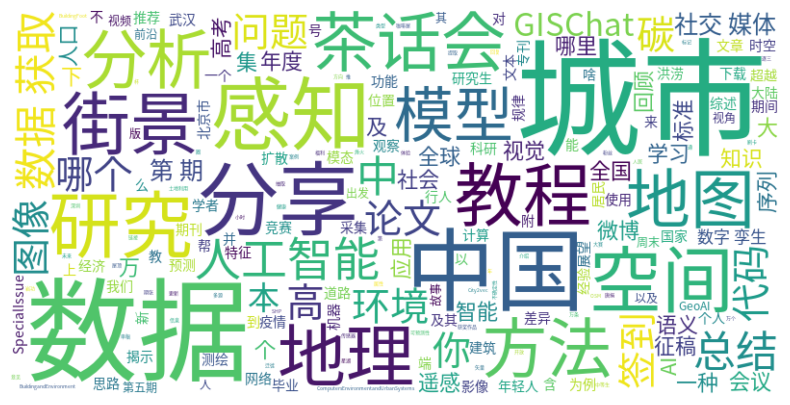

In [7]:
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 合并所有主标题文本
all_titles = ' '.join(df['main_title'])

# 定义停用词列表
# stopwords = set(["从","如何","的", "和", "是", "在","amp","基于","第期","与"])
stopwords = set(["从","如何","的", "和", "是", "在","amp","基于","第期","与","第五期","你","及其","及","其","个","以及","第","期"])


# 使用jieba进行分词并清洗文本
words = jieba.cut(all_titles)
filtered_words = [word for word in words if word not in stopwords]

# 将清洗后的词语重新组合成字符串
all_titles_cleaned = ' '.join(filtered_words)

# 设置中文字体路径
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"

# 创建词云对象，设置字体路径
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path, stopwords=stopwords)
# 生成词云
wordcloud.generate(all_titles_cleaned)
# 使用matplotlib显示词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不显示坐标轴
plt.show()

添加图片遮罩

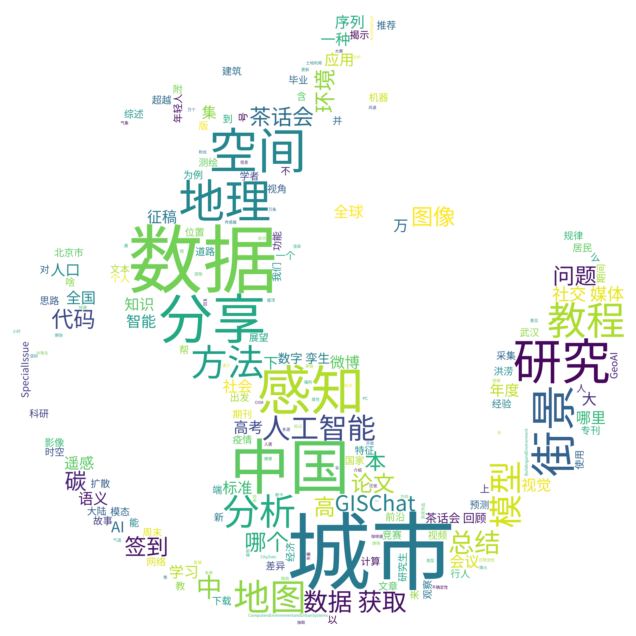

In [8]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 加载你的PNG图片作为遮罩
# image_path = 'gischat-tea-words.png'  # 替换为你的图片路径
image_path = 'gischat-tea-sea.png'  # 替换为你的图片路径
image = np.array(Image.open(image_path))

all_titles = ' '.join(df['main_title'])

# 定义停用词列表
stopwords = set(["从","如何","的", "和", "是", "在","amp","基于","第期","与","第五期","你","及其","及","其","个","以及","第","期","一种"])

# 使用jieba进行分词并清洗文本
words = jieba.cut(all_titles)
filtered_words = [word for word in words if word not in stopwords]

# 将清洗后的词语重新组合成字符串
all_titles_cleaned = ' '.join(filtered_words)

# 创建词云对象，设置遮罩
wc = WordCloud(
    mask=image,  # 使用图片作为遮罩
    width=image.shape[1],
    height=image.shape[0],
    background_color='white',
    font_path="/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc", # 指定中文字体路径
    stopwords=stopwords
)


# 生成词云
wc.generate(all_titles_cleaned)

# 使用matplotlib显示词云
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # 不显示坐标轴
plt.show()